In [ ]:
#Ramicane seems the best treatment because it has the lowest tumor mean volume.
#The worst by mean tumor volume is ketapril.
#249/1893 means 1,644 are duplicates 

# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

total_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
total_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.
total_mice = len(total_data['Mouse ID'])
total_mice

1893

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#use loc to get .duplicate of 

duplicate_mouse_ids = total_data.loc[total_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_data= total_data['Mouse ID'].unique()
unique_mice_data
#total_mice.apply()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [25]:
# Checking the number of mice in the clean DataFrame.
rat_total = len(unique_mice_data)
rat_total

249

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#by_tumor = pd.DataFrame(total_data)
#by_tumor.describe()
#by_tumor = total_data('Drug Regimen').unique()
#by_tumor = total_mice['Drug Regimen'].unique()
#by_tumor.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = total_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = total_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = total_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor = total_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = total_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame( {"Mean Tumor Volume":tumor_mean,
                              "Median Tumor Volume":tumor_median,
                              "Tumor Volume Variance":tumor_var,
                              "Tumor Volume Std. Dev.":std_tumor,
                              "Tumor Volume Std. Err.":sem_tumor})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = total_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

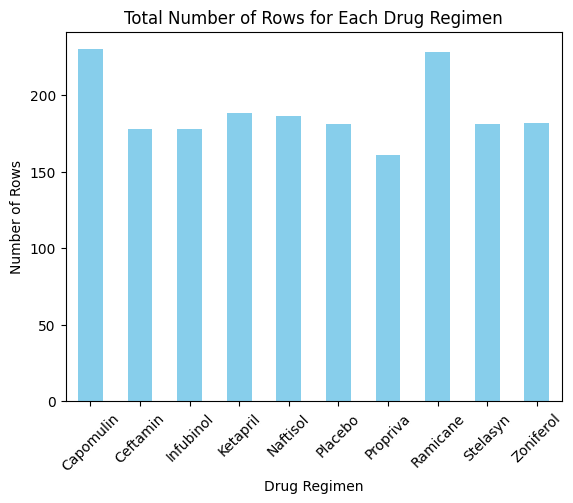

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#X = np.arange(rat_total)
#Y = np.random.uniform(1,rat_total,rat_total)
#plt.bar(rat_total,summary_table['Drug Regimen'], color ='maroon',width=.4)
#lt.show()
regimen_counts = total_data.groupby('Drug Regimen').size()
# Create a bar plot using Pandas plotting functionality
regimen_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

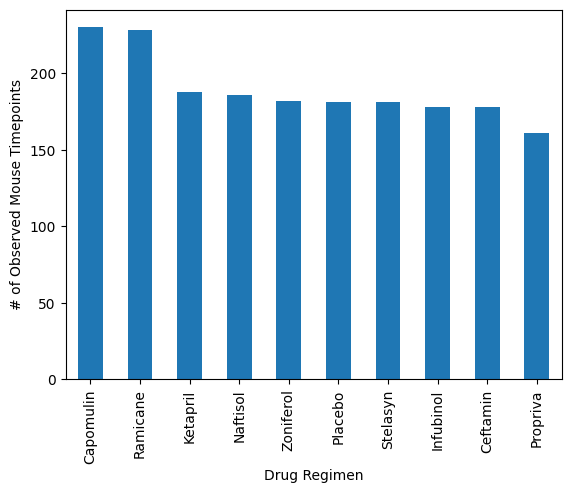

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#x_axis = total_data.groupby('Drug Regimen')
#y_axis = total_data.groupby('Mouse ID').size()
#plt.bar(x_axis, y_axis, color='b')
#plt.title("Number of Mice Tested per Treatment")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of Mice")
#plt.xticks(rotation="vertical")
counts = total_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
#plt.show()



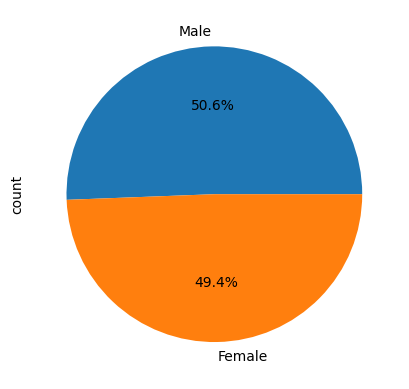

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = total_data.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

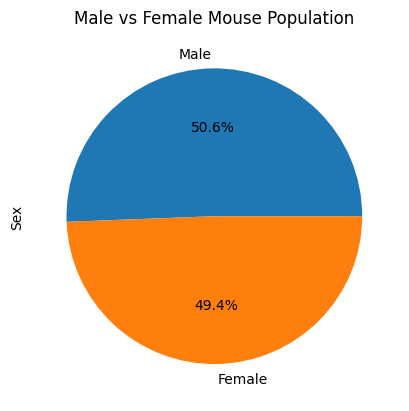

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = counts.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = total_data.loc[total_data['Drug Regimen'] == 'Capomulin',:]
Ramicane_df = total_data.loc[total_data['Drug Regimen'] == 'Ramicane', :]
Infubinol_df = total_data.loc[total_data['Drug Regimen'] == 'Infubinol', :]
Ceftamin_df = total_data.loc[total_data['Drug Regimen'] == 'Ceftamin', :]
# Start by getting the last (greatest) timepoint for each mouse
#last_timepoint = total_data.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)"))
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = total_data.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
#Capomulin_vol = pd.DataFrame(Capomulin_last)
#Capomulin_merge = pd.merge(Capomulin_vol, total_data, on=("Mouse ID","Timepoint"),how="left")
#Capomulin_merge.head()
#Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
#Ramicane_vol = pd.DataFrame(Ramicane_last)
#Ramicane_merge = pd.merge(Ramicane_vol, total_data, on=("Mouse ID","Timepoint"),how="left")
#Ramicane_merge.head()
#Ramicane_merge.to_csv("output.csv")
#Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
#Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
#Infubinol_vol = pd.DataFrame(Infubinol_last)
#Infubinol_merge = pd.merge(Infubinol_vol, total_data, on=("Mouse ID","Timepoint"),how="left")
#Infubinol_merge.head()
#Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
#Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
#Ceftamin_vol = pd.DataFrame(Ceftamin_last)
#Ceftamin_merge = pd.merge(Ceftamin_vol, total_data, on=("Mouse ID","Timepoint"),how="left")
#Ceftamin_merge.head()
#Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = total_data[total_data["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [63]:
# Put treatments into a list for for loop (and later for plot labels)

mouse_ids = list(total_data["Mouse ID"].unique())
max_times = []
for mouse in mouse_ids:
    maxidx = total_data.loc[total_data["Mouse ID"]==mouse,:]
    max_times.append(maxidx["Timepoint"].idxmax())
max_times = list(total_data.iloc[i,[1,2,7]] for i in max_times)
max_times = pd.DataFrame(data=max_times)
max_times.rename(columns={
    "Tumor Volume (mm3)":"Final Tumor Vol"
},inplace=True)
max_times
# Create empty list to fill with tumor vol data (for plotting)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
final_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
   # max_drug = max_times.loc[max_times["Drug Regimen"]==drug,:]
    #quartiles = max_drug["Final Tumor Vol"].quantile([.25,.5,.75])
    #lowerq = quartiles[0.25]
    #upperq = quartiles[0.75]
    #iqr = upperq-lowerq
    #lower_bound = lowerq - (1.5*iqr)
    #upper_bound = upperq + (1.5*iqr)
    #print(f"The lower quartile of Final Tumor Vol for {drug} is: {lowerq}")
    #print(f"The upper quartile of Final Tumor Vol for {drug} is: {upperq}")
    #print(f"The interquartile range of Final Tumor Vol for {drug} is: {iqr}")
    #print(f"The the median of Final Tumor Vol for {drug} is: {quartiles[0.5]} ")
    #print(f"\nValues below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")
    # Determine outliers using upper and lower bounds
    #outlier_vol = max_drug.loc[(max_drug['Final Tumor Vol'] < 
     #   lower_bound) | (max_drug['Final Tumor Vol'] > upper_bound)]
    #if len(outlier_vol) == 0:
     #   print(f"\n{drug} has no potential outliers\n")
      #  print("-------------------------------------")
    #else:
     #   print(f"\nPotential outliers for {drug}")
      #  print(outlier_vol.to_string(index=False))
       # print("-------------------------------------")
    # add subset 
    #max_drug = max_drug.loc['Final Tumor Vol']
    #final_vol.append(max_drug)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:

     print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    
    treatment+=1 


The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 87.67 could be Ceftamin outliers.


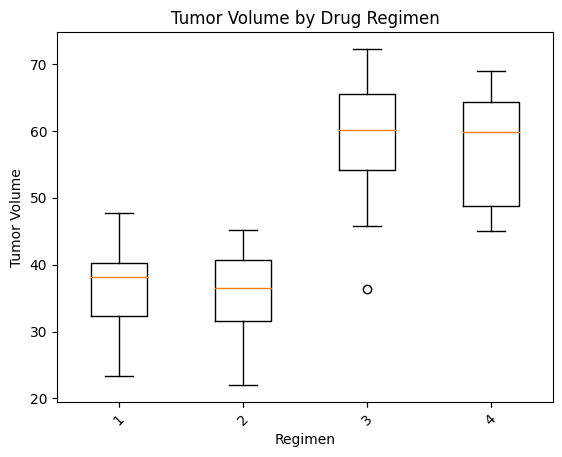

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

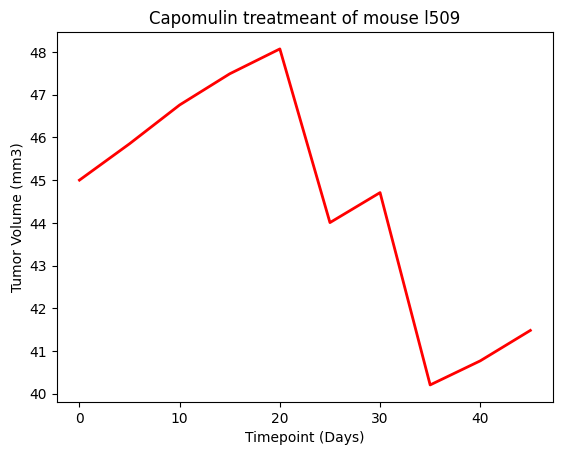

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="red", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

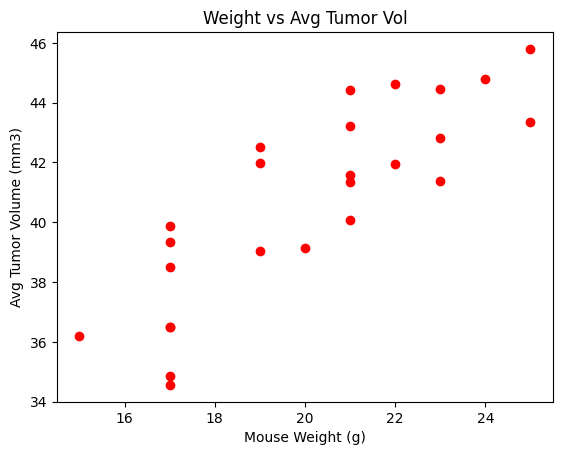

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_regimen = total_data.loc[total_data["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(cap_regimen["Weight (g)"],cap_regimen["Tumor Volume (mm3)"],color="r")
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-squared is: 0.709


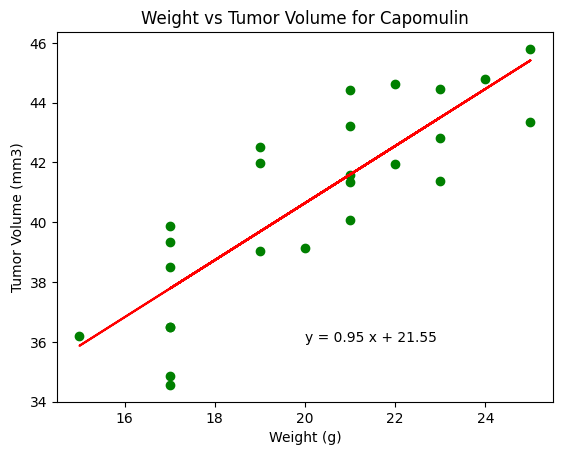

In [76]:
# Calculate the correlation coefficient and a linear regression model 
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_regimen["Weight (g)"],cap_regimen["Tumor Volume (mm3)"])
regress_values=cap_regimen["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(cap_regimen["Weight (g)"],cap_regimen["Tumor Volume (mm3)"],color='g')
plt.plot(cap_regimen["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()